# LINEAR REGRESSION

- Simple linear regression

- Multiple linear regression

- Principle components regression

- Partial least squares regression

- Ridge regression

- Lasso regression

- Elastic net regression


**For each model:** 
   
    - model
    - prediction
    - model optimization
    


# Simple Linear Regression

**Main purpose:** finding linear function of relationship between dependent variable and independent variable

- predict the coefficients that will minimize the sum of error squares

![](img1.jpg)

We don't have B0 and B1 parameters. E is error. X is independent variable. Y is dependent variable. 

b0 and b1 and estimators of B0 and B1

![](img2.jpg)

ei means errors, residuals

![](img3.jpg)

SSE is sum of error squares. b0 and b1 can be found by differentiation.

**simple linear regression geometrical representation:**

![](img4.jpg)

blue points: real values

red line: predicted values



## Modelling

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#df = df.iloc[:,1:len(df)]

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- Avoid indexes to be considered as variable by using usecols or df.iloc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Similarity of median and 50% value is important. If they are very different, it means that distribution is skew; they should be close. If they are close; bigger std dev means heterogenity.

- any missing value?

In [8]:
df.isnull().values.any()

False

- variable distributions and correlations:

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- it seems like TV has the highest impact.

- observe by drawing pairplot:

In [10]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

- It seems like newspaper distribution is skew. Others are better. slope represents severity in dotplots; if it goes down there is a negative relationship.

- Relationship betw TV  and sales:

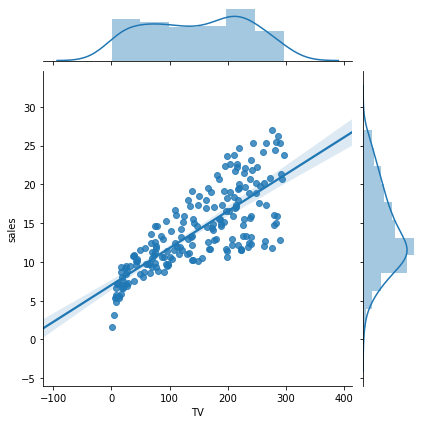

In [11]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

- Sales has a normal distribution.

## Modelling with statsmodels

In [12]:
import statsmodels.api as sm

- Choose X for one variable matrix:

In [13]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


- Add 1 as a variable to X matrix in order to solve regression problem:

In [15]:
X = sm.add_constant(X)

In [16]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [17]:
y = df["sales"]

In [18]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

- Create linear model: (y - dependent variable, x - independent variable)

In [19]:
lm = sm.OLS(y,X)

In [20]:
model = lm.fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           1.47e-42
Time:                        20:47:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Craeting model by naming the variables:

In [22]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           1.47e-42
Time:                        20:47:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- To see only parameters:

In [23]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

- B0: 7.03 and B1: 0.0475

- To get only parameter details:

In [24]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


- To get only parameter confidence intervals:

In [25]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


- To get only significance statistics of the model:

In [26]:
model.f_pvalue

1.4673897001947095e-42

- To see how many numbers there are after the dot:

In [27]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [28]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [29]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


- Model evaluation statistics about only significance of the model:


In [30]:
model.mse_model

3314.6181668686486

In [31]:
model.rsquared_adj

0.6099148238341623

- To get values predicted by the model:

In [32]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

- To get only real values:

In [33]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

- Mathematical equation of the model:

In [34]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


- Visualization:

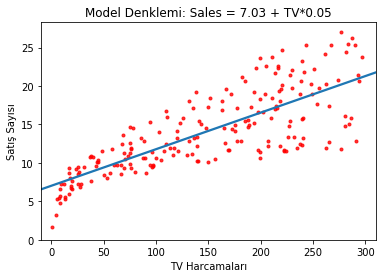

In [35]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

- sklearn: machine learning library in python

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([0.04753664])

- R-squared:

In [38]:
model.score(X,y)

0.611875050850071

- Predicted values:

In [39]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Prediction

- Predict by using the model:

Model equation:

Sales = 7.03 + TV*0.04

**Ex:** For 30 units of spending for TV; what would be the predicted sales value?

In [40]:
7.03 + 30*0.04

8.23

## scikit-learn model

In [41]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [42]:
model.predict([[30]])

array([8.45869276])

- Predict with 3  values:

In [44]:
new_data = [[5],[90],[200]]

In [45]:
model.predict(new_data)

array([ 7.27027675, 11.31089119, 16.53992164])

## Residues and their importance for machine learning

- Estimating mean squared error and r-squared with rsklearn:

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

- Mean of square of difference between predicted and real values - mean sequared error (mean error per unit):

In [48]:
mse = mean_squared_error(y, model.fittedvalues)

In [49]:
mse

10.512652915656757

- Square root of mse:

In [50]:
import numpy as np
rmse = np.sqrt(mse)

In [51]:
rmse

3.2423221486546887

- Predict by using reg:

In [52]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

- Real values:

In [53]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

- Comparison table to see residuals:

In [56]:
k_t = pd.DataFrame({"real_y": y[0:10],
                   "pred_y": reg.predict(X)[0:10]})

In [57]:
k_t

,real_y,pred_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


- For each y, what is the error of prediction?

In [58]:
k_t["error"] = k_t["real_y"] - k_t["pred_y"]

In [59]:
k_t

,real_y,pred_y,error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


- Squared error:

In [60]:
k_t["error_square"] = k_t["error"]**2

In [61]:
k_t

,real_y,pred_y,error,error_square
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


- Sum of squared error:

In [63]:
np.sum(k_t["error_square"])

92.90350329638103

- Mean squared error:

In [65]:
np.mean(k_t["error_square"])

9.290350329638105

- Square root of mean squared error:

In [66]:
np.sqrt(np.mean(k_t["error_square"]))

3.048007599996776

- Model residues:

In [67]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

- Visualization of residues:

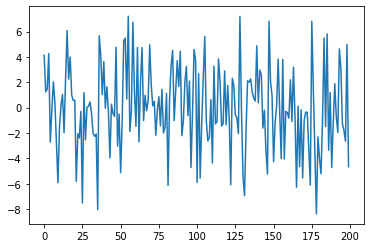

In [68]:
plt.plot(model.resid)

# Multiple Linear Regression


**Main purpose:** finding linear function of relationship between dependent variables and independent variables

Find parameter predictions to minimize sum of squared errors

    
![](img5.jpg)

**Assumptions:**

- errors distributes normally  
- errors are independent and there is no autocorrelation between them  
- error variances is constant for each observation  
- no relation between variables and error term  
- no multiple linear relation problem between independent variables  


## Modelling with Multiple Linear Regression

In [69]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- Test-train:

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [71]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [72]:
X_train.shape

(160, 3)

In [73]:
y_train.shape

(160,)

In [74]:
X_test.shape

(40, 3)

In [75]:
y_test.shape

(40,)

In [76]:
training = df.copy()

In [77]:
training.shape

(200, 4)

## statsmodels

In [78]:
lm = sm.OLS(y_train, X_train)

In [79]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):                   1.28e-137
Time:                        21:01:08   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- To evaluate prediction success, look at mse, rmse:

In [80]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## scikit-learn model

In [81]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [82]:
model.intercept_

2.979067338122629

In [83]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Prediction

Model equation:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

**Ex:** For 30 units spending for TV, 10 units for radio, 40 units for newspaper, predict sales?


In [84]:
new_data = [[30], [10],[40]]
new_data = pd.DataFrame(new_data).T

In [85]:
model.predict(new_data)

array([6.32334798])

In [86]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [87]:
rmse

1.644727765644337

- This is train error

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [89]:
rmse

1.7815996615334502

- This is test error

## Model Tuning / Model Doğrulama

In [90]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [91]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [92]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [93]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701036

- When random_state changes, these values also change.

In [94]:
model.score(X_train, y_train)

0.8971614078663419

In [95]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8733783298422942

- This is validated mean r-squared value of the model

- For rmse:

In [96]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872927

In [97]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

# PCR - PRINCIPAL COMPONENT REGRESSION

After applying dimension reduction to variables, regression model is crated for produced components

![](img7.jpg)


In [98]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


- Convert to dummy variable format:

In [101]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [102]:
y = df["Salary"]

- Drop dependent variables and old version categorical variables:

In [103]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [104]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [105]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


**X:** independent variables

**y:** dependent variable (salary)

- Test - train:

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


- PCA:

In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [109]:
X_reduced_train = pca.fit_transform(scale(X_train))

- Examine first obs and all components:

In [110]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

- Varianca for first 5 components:

In [111]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

- Fit the model using all components:

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lm = LinearRegression()

In [114]:
pcr_model = lm.fit(X_reduced_train, y_train)

- B0 and coefficients for 19 variables:

In [115]:
pcr_model.intercept_

543.4834416243655

In [116]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Prediction

- Predicted values:

In [117]:
y_pred = pcr_model.predict(X_reduced_train)

In [118]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

- Estimate error and r-square for train set:

In [119]:
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [121]:
df["Salary"].mean()

535.9258821292775

In [122]:
r2_score(y_train, y_pred)

0.5770075250410179

- Test error:

In [123]:
pca2 = PCA()

In [124]:
X_reduced_test = pca2.fit_transform(scale(X_test))

- Predict y:

In [125]:
y_pred = pcr_model.predict(X_reduced_test)

In [126]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499646

## Model Tuning

Test error for 1 components and all components:

- for all components:       pcr_model = lm.fit(X_reduced_train, y_train)
                            y_pred = pcr_model.predict(X_reduced_test)


- for 1 component:          pcr_model = lm.fit(X_reduced_train[:,0:1], y_train)
                            y_pred = pcr_model.predict(X_reduced_test[:,0:1])

In [127]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


- optimum component count:

In [128]:
from sklearn import model_selection

In [129]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [130]:
lm = LinearRegression()

In [131]:
RMSE = []

In [132]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

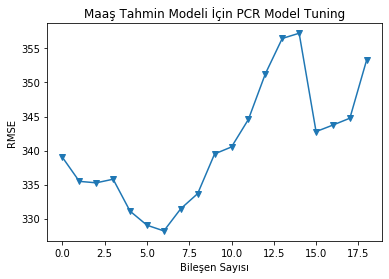

In [133]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

- For 6 components, RMSE is min. Optimum component: 6


- Final model with optimum component count:

In [134]:
lm = LinearRegression()

In [135]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

- Error for train:

In [136]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [137]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


- Error for test:

In [138]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [139]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


# PLS - PARTIAL LEAST SQUARES REGRESSION



![](img8.jpg)

predictor -> variable


## Model

In [140]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [141]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [142]:
pls_model = PLSRegression().fit(X_train, y_train)

- To change component count:

pls_model = PLSRegression(n_components=6).fit(X_train, y_train)

In [143]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Prediction

In [144]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [145]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

- Look at train error and test error without validation:

In [146]:
y_pred = pls_model.predict(X_train)

In [147]:
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [148]:
r2_score(y_train, y_pred)

0.5140424486535482

In [149]:
y_pred = pls_model.predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

## Model Tuning

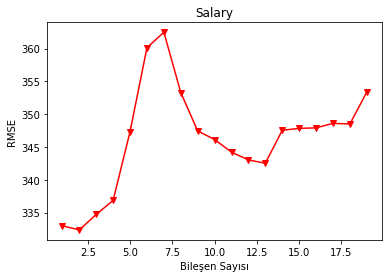

In [152]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Loop for error estimation:
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Visualization:
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

- Cross validation -> for 2 components; RMSE is min

- Create final model with 2 components:

In [153]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

- Test error with final model:

In [154]:
y_pred = pls_model.predict(X_test)

In [155]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

# RIDGE REGRESSION

- Use penalty for finding parameters minimizing sum of squared errors

EKK:

![](img11.jpg)

SSE - classical EKK

SSEL2 - for Lidge regression

Lambda - penalty parameter


## Model

In [156]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [157]:
from sklearn.linear_model import Ridge

In [158]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [159]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [160]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

alpha = lambda = 1

- Coefficients for different lambda values:

In [161]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

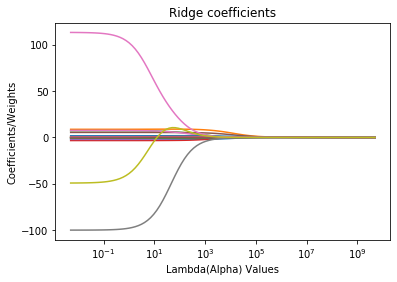

In [162]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coeff = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coeff.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdas, coeff) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge coefficients');

## Prediction

In [163]:
y_pred = ridge_model.predict(X_test)

In [164]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282844

## Model Tuning

In [165]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

In [166]:
lambdas[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [169]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [170]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [171]:
ridge_cv.alpha_

0.7599555414764666

- We found optimum lambda value.

- Final model and test error:

In [172]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [173]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

# LASSO REGRESSION

![](img13.jpg)


## Model

In [174]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [175]:
from sklearn.linear_model import Lasso

In [176]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [177]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [178]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

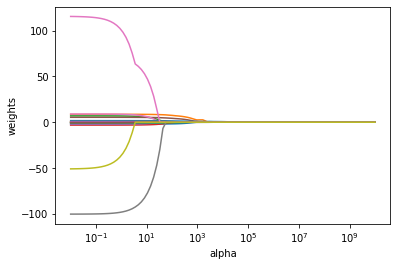

In [179]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Prediction

In [180]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [181]:
y_pred = lasso_model.predict(X_test)

In [182]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148771

## Model Tuning

- Find optimum lambda value:

In [183]:
from sklearn.linear_model import LassoCV

In [184]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [185]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [186]:
lasso_cv_model.alpha_

0.39406126432470073

final model:

In [187]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [188]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

- Test error for final model:

In [189]:
y_pred = lasso_tuned.predict(X_test)

In [190]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.52263769583686

# ElasticNet REGRESSION

Integrates ElasticNet L1 and L2 approaches.

![](img16.jpg)


## Model

In [191]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [192]:
from sklearn.linear_model import ElasticNet

In [193]:
enet_model = ElasticNet().fit(X_train, y_train)

- Coefficients:

In [194]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

- B0 constant:

In [195]:
enet_model.intercept_

-6.465955602112672

## Prediction

In [196]:
enet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [197]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [198]:
y_pred = enet_model.predict(X_test)

- Test error:

In [199]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181245

- r-squared:

In [200]:
r2_score(y_test, y_pred)

0.4107022246932689

## Model Tuning

In [201]:
from sklearn.linear_model import ElasticNetCV

In [202]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

- Optimum alpha:

In [203]:
enet_cv_model.alpha_

5230.7647364798695

In [204]:
enet_cv_model

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

- Tuned final model:

In [205]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [206]:
y_pred = enet_tuned.predict(X_test)

In [207]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795